In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
df = pd.read_excel('owan04.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [48]:
df

,X1,X2,X3,X4,X5
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


In [49]:
df.columns = ['pizza', 'baker', 'shoe', 'gift', 'pet']

In [50]:
df

,pizza,baker,shoe,gift,pet
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


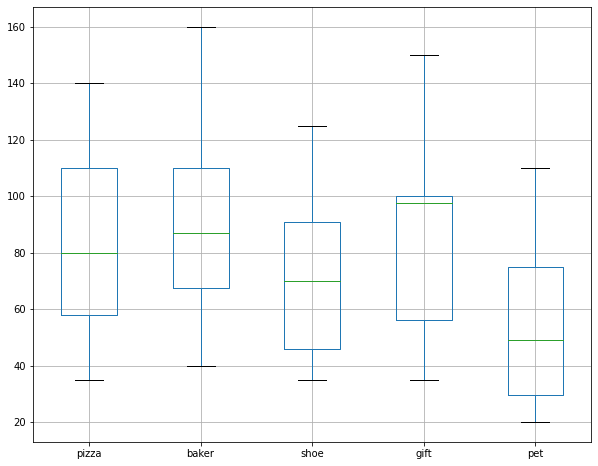

In [51]:
fig, ax = plt.subplots(figsize = (10, 8))
df.boxplot(column = ['pizza', 'baker', 'shoe', 'gift', 'pet'])
plt.show()

***assumptions of anova***
1. Independence
2. Approximately Normal
3. Constant variance

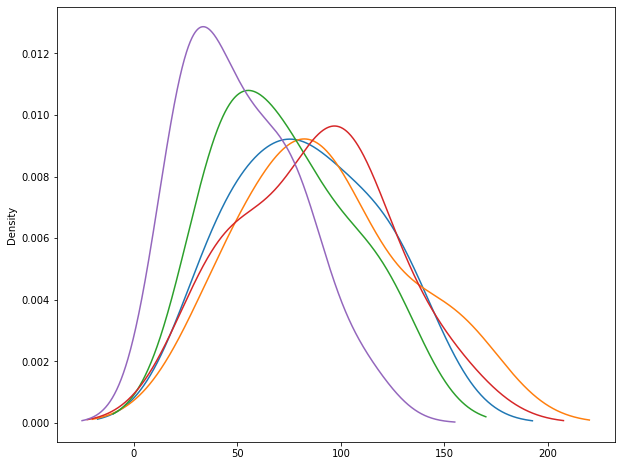

In [52]:
# Approximately Normal
fig, ax = plt.subplots(figsize = (10, 8))
df['pizza'].plot.kde()
df['baker'].plot.kde()
df['shoe'].plot.kde()
df['gift'].plot.kde()
df['pet'].plot.kde()
plt.show()

In [53]:
# Constant variance
# summary statistics
df.describe()

,pizza,baker,shoe,gift,pet
count,13.000000,11.000000,10.000000,10.000000,16.000000
mean,83.000000,92.090909,72.300000,87.000000,51.625000
std,34.134538,38.893327,31.365409,35.904194,27.074896
min,35.000000,40.000000,35.000000,35.000000,20.000000
25%,58.000000,67.500000,45.750000,56.250000,29.500000
50%,80.000000,87.000000,70.000000,97.500000,49.000000
75%,110.000000,110.000000,90.750000,100.000000,75.000000
max,140.000000,160.000000,125.000000,150.000000,110.000000


In [54]:
# impute
df.mean()

pizza    83.000000
baker    92.090909
shoe     72.300000
gift     87.000000
pet      51.625000
dtype: float64

In [55]:
df = df.fillna(df.mean())

In [56]:
df

,pizza,baker,shoe,gift,pet
0,80.0,150.000000,48.0,100.0,25
1,125.0,40.000000,35.0,96.0,80
2,35.0,120.000000,95.0,35.0,30
3,58.0,75.000000,45.0,99.0,35
4,110.0,160.000000,75.0,75.0,30
5,140.0,60.000000,115.0,150.0,28
6,97.0,45.000000,42.0,45.0,20
7,50.0,100.000000,78.0,100.0,75
8,65.0,86.000000,65.0,120.0,48
9,79.0,87.000000,125.0,50.0,20


**mean square between groups (MSG)**

$MSG = \frac{1}{df_G} SSG = \frac{1}{k-1} \sum_{i=1}^{k} n_i(\bar{x}_i - \bar{x})^2$

In [57]:
# calculate dfg = k - 1
k = len(df.columns)

dfg = k - 1
print(dfg)

4


In [58]:
# x_bar
x_bar = np.mean(np.array(df.describe().loc['mean']))

In [59]:
# square between groups
np.dot(np.array(df.describe().loc['count']), np.square(np.array(df.describe().loc['mean']) - x_bar))

16472.155966942148

In [60]:
# mean square between groups (MSG)
msg = np.dot(np.array(df.describe().loc['count']), np.square(np.array(df.describe().loc['mean']) - x_bar)) / dfg
print(msg)

4118.038991735537


**mean square error (MSE)**

$MSE = \frac{1}{df_E} SSE = \frac{1}{n - k} \sum_{i = 1}^{k} (n_k - 1)s_k^2$

In [61]:
# calculate dfe = n-k
dfe = len(df.columns) * len(df) - k
print(dfe)

75


In [62]:
# square error
np.dot(np.array(df.describe().loc['count'] - 1), np.square(np.array(df.describe().loc['std'])))

60560.75909090909

In [63]:
# mean square error
mse = np.dot(np.array(df.describe().loc['count'] - 1), np.square(np.array(df.describe().loc['std']))) / dfe
print(mse)

807.4767878787878


**f-statistic**

$F = \frac{MSG}{MSE}$

In [64]:
f_stat = msg / mse
print(f_stat)

5.099885289029144


In [65]:
# p-value
1 - stats.f.cdf(f_stat, dfg, dfe)

0.0010888219204946425

***computationally***

In [66]:
stats.f_oneway(df['pizza'], df['baker'], df['shoe'], df['gift'], df['pet'])

F_onewayResult(statistic=5.099885289029144, pvalue=0.0010888219204945957)

***computationally - anova table***

In [67]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['pizza', 'baker', 'shoe', 'gift', 'pet'])
# replace column names
df_melt.columns = ['index', 'business', 'cost']

In [68]:
# Ordinary Least Squares (OLS) model
model = ols('cost ~ C(business)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(business),16472.155967,4.0,5.099885,0.001089
Residual,60560.759091,75.0,NaN,NaN


***Tukey’s honestly significantly differenced (HSD)***

In [70]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='cost', xfac_var='business', anova_model='cost ~ C(business)')
res.tukey_summary

c:\users\s\desktop\workspace\notebooks\statistics\venv\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,pizza,baker,9.090909,-18.991844,37.173663,1.279683,0.890431
1,pizza,shoe,10.700000,-17.382753,38.782753,1.506186,0.800808
2,pizza,gift,4.000000,-24.082753,32.082753,0.563060,0.900000
3,pizza,pet,31.375000,3.292247,59.457753,4.416505,0.020827
4,baker,shoe,19.790909,-8.291844,47.873663,2.785869,0.290808
5,baker,gift,5.090909,-22.991844,33.173663,0.716622,0.900000
6,baker,pet,40.465909,12.383156,68.548663,5.696187,0.001230
7,shoe,gift,14.700000,-13.382753,42.782753,2.069247,0.578012
8,shoe,pet,20.675000,-7.407753,48.757753,2.910318,0.249249
9,gift,pet,35.375000,7.292247,63.457753,4.979565,0.006416


In [71]:
res.tukey_summary[res.tukey_summary['p-value'] < 0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
3,pizza,pet,31.375000,3.292247,59.457753,4.416505,0.020827
6,baker,pet,40.465909,12.383156,68.548663,5.696187,0.001230
9,gift,pet,35.375000,7.292247,63.457753,4.979565,0.006416


***Test ANOVA assumptions***

In [72]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9549962282180786 0.00673189340159297


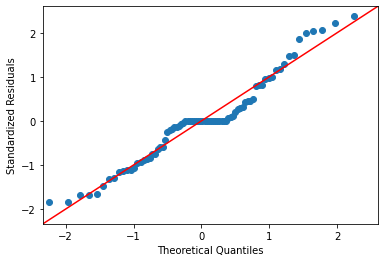

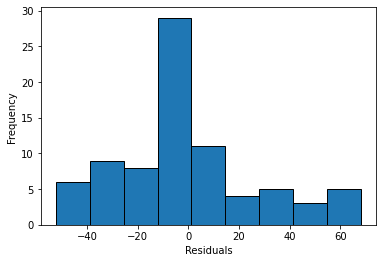

In [73]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()